In [2]:
import sys
import os

# Add project root to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

print("Project root added:", project_root)

Project root added: c:\GitHub\illumination-invariant-representations


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from data.generate_images import generate_pair
from src.representations import raw_representation, edge_representation


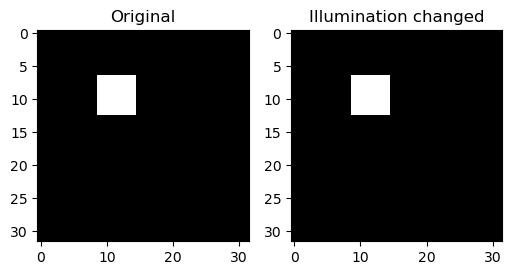

In [4]:
img1, img2 = generate_pair()

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(img1, cmap="gray")
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(img2, cmap="gray")
plt.title("Illumination changed")
plt.show()


In [5]:
r1 = raw_representation(img1)
r2 = raw_representation(img2)

e1 = edge_representation(img1)
e2 = edge_representation(img2)

raw_dist = np.linalg.norm(r1 - r2)
edge_dist = np.linalg.norm(e1 - e2)

print("Raw distance:", raw_dist)
print("Edge distance:", edge_dist)


Raw distance: 4.871278835116367
Edge distance: 0.0007201227160380369


In [6]:
raw_dists = []
edge_dists = []

for _ in range(200):
    a, b = generate_pair()
    raw_dists.append(
        np.linalg.norm(raw_representation(a) - raw_representation(b))
    )
    edge_dists.append(
        np.linalg.norm(edge_representation(a) - edge_representation(b))
    )

print("Mean raw dist:", np.mean(raw_dists))
print("Mean edge dist:", np.mean(edge_dists))


Mean raw dist: 2.10859638034061
Mean edge dist: 0.00024994320424118964


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example distances (replace with your computed arrays if needed)
raw_dists = raw_distances      # list or numpy array
edge_dists = edge_distances    # list or numpy array

plt.figure(figsize=(5, 4))

plt.hist(raw_dists, bins=30, alpha=0.7, label="Raw representation")
plt.hist(edge_dists, bins=30, alpha=0.7, label="Edge representation")

plt.xlabel("Embedding distance after illumination change")
plt.ylabel("Frequency")
plt.legend()
plt.title("Effect of Illumination on Representations")

plt.tight_layout()
plt.savefig("results/illumination_invariance_comparison.png", dpi=200)
plt.show()
plt.close()
